# Project: Analyzing Movie Reviews

Analysis of the dataset coming from FiveThirtyEight. The story is about different movie rating sites. The link to the story is [here](http://fivethirtyeight.com/features/fandango-movies-ratings/)

## Data Exploration

In [107]:
import pandas as pd

movies = pd.read_csv('fandango_score_comparison.csv')

In [108]:
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


Each row represents a single movie. Each column contains information about how the online moview review services RottenTomatoes, Metacritic, IMDB, and Fandango rated the movie. The dataset was put together to help detect bias in the movie review sites. Each of these sites has 2 types of score -- User scores, which aggregate user reviews, and Critic score, which aggregate professional critical reviews of the movie. Each service puts their ratings on a different scale:

- RottenTomatoes -- 0-100, in increments of 1.
- Metacritic -- 0-100, in increments of 1.
- IMDB -- 0-10, in increments of .1.
- Fandango -- 0-5, in increments of .5.

Typically, the primary score shown by the sites will be the Critic score. Here are descriptions of some of the relevant columns in the dataset:

- FILM -- the name of the movie.
- RottenTomatoes -- the RottenTomatoes (RT) critic score.
- RottenTomatoes_User -- the RT user score.
- Metacritic -- the Metacritic critic score.
- Metacritic_User -- the Metacritic user score.
- IMDB -- the IMDB score given to the movie.
- Fandango_Stars -- the number of stars Fandango gave the movie.

To make it easier to compare scores across services, the columns were normalized so their scale and rounding matched the Fandango ratings. Any column with the suffix _norm is the corresponding column changed to a 0-5 scale. For example, RT_norm takes the RottenTomatoes column and turns it into a 0-5 scale from a 0-100 scale. Any column with the suffix _round is the rounded version of another column. For example, RT_user_norm_round rounds the RT_user_norm column to the nearest .5.

## Statistical Exploration

We'll primarily focus on the Metacritic_norm_round and the Fandango_Stars columns, which will let us see how Fandango and Metacritic differ in terms of review scores.

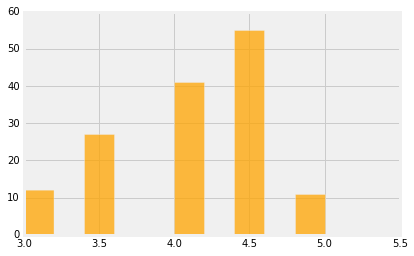

In [109]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')
%matplotlib inline

plt.hist(movies['Fandango_Stars'], color = 'orange', alpha = 0.75)
plt.show()

(array([  1.,   2.,  20.,  14.,   0.,  22.,  27.,  20.,  25.,  15.]),
 array([ 0.5,  0.9,  1.3,  1.7,  2.1,  2.5,  2.9,  3.3,  3.7,  4.1,  4.5]),
 <a list of 10 Patch objects>)

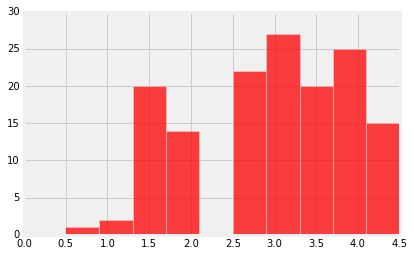

In [110]:
plt.hist(movies['Metacritic_norm_round'], color = 'red', alpha = 0.75)

## Mean, Median, And Standard Deviation

Studying the data with statistical tool will allow us to understand the difference. We'll be looking at the mean, the median and the standard deviation of the Fandango and Metacritic data. 

In [111]:
import numpy

f_mean = movies["Fandango_Stars"].mean()
m_mean = movies["Metacritic_norm_round"].mean()
f_std = movies["Fandango_Stars"].std()
m_std = movies["Metacritic_norm_round"].std()
f_median = movies["Fandango_Stars"].median()
m_median = movies["Metacritic_norm_round"].median()

print(f_mean)
print(m_mean)
print(f_std)
print(m_std)
print(f_median)
print(m_median)

4.089041095890411
2.9726027397260273
0.5403859779787333
0.9909605613743364
4.0
3.0


### Fandango vs Metacritic Methodology

Fandango appears to inflate ratings and isn't transparent about how it calculates and aggregates ratings. Metacritic publishes each individual critic rating, and is transparent about how they aggregate them to get a final rating.

### Fandango vs Metacritic number differences

The median metacritic score appears higher than the mean metacritic score because a few very low reviews "drag down" the median. The median fandango score is lower than the mean fandango score because a few very high ratings "drag up" the mean.

Fandango ratings appear clustered between 3 and 5, and have a much narrower random than Metacritic reviews, which go from 0 to 5.

Fandango ratings in general appear to be higher than metacritic ratings.

These may be due to movie studio influence on Fandango ratings, and the fact that Fandango calculates its ratings in a hidden way.

# Scatter Plots

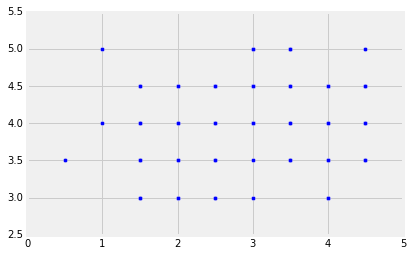

In [112]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [113]:
movies["fm_diff"] = numpy.abs(movies["Metacritic_norm_round"] - movies["Fandango_Stars"])

In [114]:
sorted_movies = movies.sort_values("fm_diff", ascending=False)

In [115]:
sorted_movies.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


# Fandango and Metacritic correlation

Let's see what the correlation coefficient between Fandango_Stars and Metacritic_norm_round is. This will help us determine if Fandango consistently has higher scores than Metacritic, or if only a few movies were assigned higher ratings.

We can then create a linear regression to see what the predicted Fandango score would be based on the Metacritic score.

In [116]:
from scipy.stats import pearsonr

r_value, p_value = pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])

r_value

0.17844919073895918

The correlation is actually fairly low. The low correlation between Fandango and Metacritic scores indicates that Fandango scores aren't just inflated, they are fundamentally different. For whatever reason, it appears like Fandango both inflates scores overall, and inflates scores differently depending on the movie.

In [117]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, stderr_slope = linregress(movies["Metacritic_norm_round"],movies["Fandango_Stars"])

Let us make a prediction based on the previous linear regression. What if we had a rating of 4 in Metacritic, what would we get on Fandango? 

In [118]:
def prediction(rating):
    pred = rating * slope + intercept
    return pred

prediction(4.0)

4.1890182307951322

If we had a movie with a rating of 4.0 on Metacritic, we would most likely see a rating of 4.5 on Fandango

In [119]:
rating = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
predictions_of_rating = []

for rate in rating:
    predic = prediction(rate)
    # I removed the following code trying to capture the upward movement of fandango ratings
    """if predic < 3.0:
        predic = 3.0
    elif predic > 3.0 and predic < 3.5:
        predic = 3.5
    elif predic > 3.5 and predic < 4.0:
        predic = 4.0
    elif predic > 4.0 and predic < 4.5:
        predic = 4.5
    else:
        predic = 5.0""" 
    predictions_of_rating.append(predic)
print(predictions_of_rating)

[3.799773918899418, 3.8970849968733465, 3.9943960748472751, 4.0917071528212032, 4.1890182307951322, 4.2863293087690604]


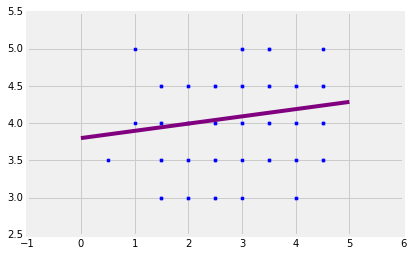

In [120]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot(rating, predictions_of_rating, color = 'purple')
plt.show()

## Conclusion

Potential next steps:

- Explore the other rating services, IMDB and RottenTomatoes.
- See how they differ from each other.
- See how they differ from Fandango.
- See how user scores differ from critic scores.
- Acquire more recent review data, and see if the pattern of Fandango inflating reviews persists.
- Dig more into why certain movies had their scores inflated more than others.